In [5]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Read dataset 
df = pd.read_csv("D:\WHOData.csv")

<>:2: SyntaxWarning: invalid escape sequence '\W'
<>:2: SyntaxWarning: invalid escape sequence '\W'
C:\Users\rreze\AppData\Local\Temp\ipykernel_24312\2656257087.py:2: SyntaxWarning: invalid escape sequence '\W'
  df = pd.read_csv("D:\WHOData.csv")


In [7]:
# Define data type
data_types = df.dtypes

In [8]:
print(data_types)

COUNTRY_CODE        object
COUNTRY             object
GHE_CAUSE_CODE       int64
GHE_CAUSE_TYPE      object
GHE_CAUSE_TITLE     object
YEAR                 int64
SEX_CODE            object
AGEGROUP_CODE       object
POPULATION         float64
DEATHS             float64
DEATHS_RATE        float64
DEATHS_100K        float64
DALY               float64
DALY_RATE          float64
DALY_100K          float64
dtype: object


In [9]:
# Data quality

# Convert 'DEATHS' column to integer
df['DEATHS'] = round(df['DEATHS']).astype(int)
print(df['DEATHS'])

# Identify outliers
column_name = 'DEATHS_100K'

# Calculate the Z-scores
z_scores = stats.zscore(df[column_name])

# Set a threshold for considering values as outliers (e.g., Z-score > 3 or Z-score < -3)
threshold = 3

# Find the indices of outliers
outlier_indices = abs(z_scores) > threshold

# Create a DataFrame with outliers and their Z-scores
outliers_df = pd.DataFrame({'Outliers': df[column_name][outlier_indices], 'Z-Scores': z_scores[outlier_indices]})

# Print outliers and their Z-scores
print("Outliers and Z-scores:")
print(outliers_df)

# Remove outliers from the DataFrame
df_without_outliers = df[~outlier_indices]

# Print the dataset without outliers
print("\nDataset without Outliers:")
print(df_without_outliers)

0         6272
1         3333
2          843
3          329
4          207
          ... 
622245       0
622246       0
622247       0
622248       0
622249       0
Name: DEATHS, Length: 622250, dtype: int32
Outliers and Z-scores:
        Outliers   Z-Scores
1965       494.9   3.522696
2096       914.0   6.589974
2227      1708.5  12.404701
2228       642.0   4.599281
2229       434.8   3.082841
...          ...        ...
622120    1540.0  11.171496
622121    1341.9   9.721656
622122    1305.0   9.451595
622123    1268.6   9.185194
622124     683.3   4.901544

[3707 rows x 2 columns]

Dataset without Outliers:
       COUNTRY_CODE                   COUNTRY  GHE_CAUSE_CODE  \
0               USA  United States of America             490   
1               USA  United States of America            1400   
2               USA  United States of America            1505   
3               USA  United States of America             390   
4               USA  United States of America           

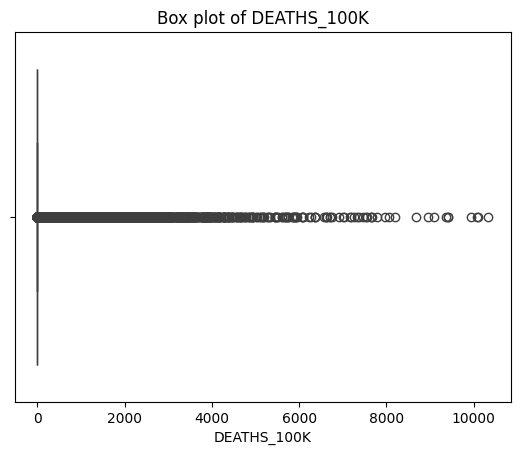

COUNTRY_CODE       0
COUNTRY            0
GHE_CAUSE_CODE     0
GHE_CAUSE_TYPE     0
GHE_CAUSE_TITLE    0
YEAR               0
SEX_CODE           0
AGEGROUP_CODE      0
POPULATION         0
DEATHS             0
DEATHS_RATE        0
DEATHS_100K        0
DALY               0
DALY_RATE          0
DALY_100K          0
dtype: int64


In [10]:
# Noises
column_name = 'DEATHS_100K'

# Box plot to visualize potential outliers
sns.boxplot(x=df[column_name])
plt.title(f'Box plot of {column_name}')
plt.show()

# Missing values
# Check for Null values
null_values = df.isnull().sum()
print(null_values)

In [11]:
# Check for unique values
unique_values = df.nunique()
print(unique_values) 
 
# Check for duplicate rows
duplicates = df[df.duplicated()]
 
# Print the duplicate rows, if any
if not duplicates.empty:
    print("Duplicate Rows:")
    print(duplicates)
else:
    print("No duplicate rows found.")
 
# Aggregation 
# Grouping by main causes and countries
grouped_data = df.groupby(['COUNTRY_CODE', 'GHE_CAUSE_CODE'])
 
# Data aggregation for death and DALY
aggregated_data = grouped_data.agg({
    'DEATHS': 'sum',
    'DALY': 'sum'
}).reset_index()
print(aggregated_data)
 
# Dimensionality reduction
columns_to_remove = ['DEATHS_RATE', 'DALY_RATE']
df = df.drop(columns=columns_to_remove)
print(df)
 
# Rename the columns
df = df.rename(columns={'GHE_CAUSE_TITLE': 'GHE_CAUSE_NAME'})
print(df['GHE_CAUSE_NAME'])
 
# Sampling
df.sample(10000)


COUNTRY_CODE           25
COUNTRY                25
GHE_CAUSE_CODE        131
GHE_CAUSE_TYPE          3
GHE_CAUSE_TITLE       131
YEAR                    5
SEX_CODE                2
AGEGROUP_CODE          19
POPULATION           4748
DEATHS               8836
DEATHS_RATE         53251
DEATHS_100K          6933
DALY               137509
DALY_RATE          240663
DALY_100K           32165
dtype: int64
No duplicate rows found.
     COUNTRY_CODE  GHE_CAUSE_CODE  DEATHS       DALY
0             AUS              30     267     6853.8
1             AUS              50       5      300.4
2             AUS              60       1     4607.9
3             AUS              70       0     1386.8
4             AUS              80       0     2278.7
...           ...             ...     ...        ...
3270          USA            1575   14582  2458712.2
3271          USA            1580    4630   221899.9
3272          USA            1610  205839  9223537.3
3273          USA            1620   90260 

,COUNTRY_CODE,COUNTRY,GHE_CAUSE_CODE,GHE_CAUSE_TYPE,GHE_CAUSE_NAME,YEAR,SEX_CODE,AGEGROUP_CODE,POPULATION,DEATHS,DEATHS_100K,DALY,DALY_100K
503895,IRN,Iran (Islamic Republic of),900,Noncommunicable diseases,Autism and Asperger syndrome,2005,FMLE,YEARS35-39,2276876.0,0,0.0,609.0,26.7
325815,ESP,Spain,1110,Noncommunicable diseases,Rheumatic heart disease,2000,FMLE,YEARS80-84,527231.0,194,36.7,2526.9,479.3
148920,IND,India,1320,Noncommunicable diseases,Gynecological diseases,2019,MLE,YEARS70-74,10982591.0,0,0.0,0.0,0.0
84954,DEU,Germany,1080,Noncommunicable diseases,Other hearing loss,2010,FMLE,YEARS5-9,1763029.0,0,0.0,418.7,23.7
424597,CHE,Switzerland,710,Noncommunicable diseases,Cervix uteri cancer,2000,FMLE,YEARS50-54,244333.0,5,2.1,215.2,88.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319152,BRA,Brazil,1180,Noncommunicable diseases,Chronic obstructive pulmonary disease,2019,FMLE,YEARS15-19,8097851.0,7,0.1,2028.4,25.0
245568,KOR,Republic of Korea,900,Noncommunicable diseases,Autism and Asperger syndrome,2019,FMLE,YEARS55-59,2065586.0,0,0.0,614.0,29.7
81333,DEU,Germany,410,"Communicable, maternal, perinatal and nutritio...",Otitis media,2005,FMLE,YEARS55-59,2337849.0,0,0.0,400.4,17.1
92556,DEU,Germany,1120,Noncommunicable diseases,Hypertensive heart disease,2015,MLE,YEARS10-14,1962623.0,0,0.0,0.0,0.0


In [12]:
# Convertion
# Convert column 'SEX_CODE'
df['SEX_CODE'] = df['SEX_CODE'].replace({'FMLE': 1, 'MLE': 0}).astype(int)

# Print DataFrame after convertion
print(df)

       COUNTRY_CODE                   COUNTRY  GHE_CAUSE_CODE  \
0               USA  United States of America             490   
1               USA  United States of America            1400   
2               USA  United States of America            1505   
3               USA  United States of America             390   
4               USA  United States of America             110   
...             ...                       ...             ...   
622245          THA                  Thailand            1050   
622246          THA                  Thailand            1360   
622247          THA                  Thailand             360   
622248          THA                  Thailand            1370   
622249          THA                  Thailand            1320   

                                           GHE_CAUSE_TYPE  \
0       Communicable, maternal, perinatal and nutritio...   
1                                Noncommunicable diseases   
2                                Non

In [13]:
# Binarization
# Setting the values in the 'YEAR' column to 1 if the original value is greater than 2010, and 0 otherwise.
df['YEAR'] = (df['YEAR'] > 2010).astype(int)
print(df.YEAR)

0         0
1         0
2         0
3         0
4         0
         ..
622245    1
622246    1
622247    1
622248    1
622249    1
Name: YEAR, Length: 622250, dtype: int32


In [15]:
# Selection of subsets units
subset = df[(df['GHE_CAUSE_NAME'] == 'Congenital anomalies') & (df['AGEGROUP_CODE'] == 'YEARS0-1') & (df['SEX_CODE'] == 'MLE')]

print(subset)
print("Number of rows:", len(subset))

Empty DataFrame
Columns: [COUNTRY_CODE, COUNTRY, GHE_CAUSE_CODE, GHE_CAUSE_TYPE, GHE_CAUSE_NAME, YEAR, SEX_CODE, AGEGROUP_CODE, POPULATION, DEATHS, DEATHS_100K, DALY, DALY_100K]
Index: []
Number of rows: 0


In [16]:
# Discretization
# Create bins (intervals) for the population
bins = [0, 1000000, 5000000, 10000000, float('inf')]

# Create a new column for population groups
df['POPULATION_GROUP'] = pd.cut(df['POPULATION'], bins=bins, labels=['<1M', '1M-5M', '5M-10M', '>10M'])

# Print both 'COUNTRY' and 'POPULATION_GROUP' columns
print(df[['COUNTRY', 'POPULATION_GROUP']])


                         COUNTRY POPULATION_GROUP
0       United States of America            1M-5M
1       United States of America            1M-5M
2       United States of America            1M-5M
3       United States of America            1M-5M
4       United States of America            1M-5M
...                          ...              ...
622245                  Thailand              <1M
622246                  Thailand              <1M
622247                  Thailand              <1M
622248                  Thailand              <1M
622249                  Thailand              <1M

[622250 rows x 2 columns]


In [18]:
# Creations of attribute

# Create a new attribute 'RISKS'
df['RISKS'] = df['DEATHS_100K'] + df['DALY_100K']
print(df.head())

  COUNTRY_CODE                   COUNTRY  GHE_CAUSE_CODE  \
0          USA  United States of America             490   
1          USA  United States of America            1400   
2          USA  United States of America            1505   
3          USA  United States of America             390   
4          USA  United States of America             110   

                                      GHE_CAUSE_TYPE  \
0  Communicable, maternal, perinatal and nutritio...   
1                           Noncommunicable diseases   
2                           Noncommunicable diseases   
3  Communicable, maternal, perinatal and nutritio...   
4  Communicable, maternal, perinatal and nutritio...   

                 GHE_CAUSE_NAME  YEAR  SEX_CODE AGEGROUP_CODE  POPULATION  \
0           Neonatal conditions     0         1      YEARS0-1   1820819.0   
1          Congenital anomalies     0         1      YEARS0-1   1820819.0   
2  Sudden infant death syndrome     0         1      YEARS0-1   1820819

In [ ]:
# Visualization
# Select the top countries with the highest number of deaths according to GHE_CAUSE_TYPE in dataset
top_15_cause_types = df.groupby("GHE_CAUSE_TYPE").agg({'DEATHS': 'sum'}).sort_values(by='DEATHS', ascending=False)[:15]

# Create a figure and a subplot
fig, ax = plt.subplots(1, 1, figsize=(15, 15), sharex=True)

# Create a bar plot using seaborn
sns.barplot(x=top_15_cause_types.index, y=top_15_cause_types['DEATHS'], ax=ax)

# Rotate the cause type names on the x-axis
ax.set_xticklabels(labels=top_15_cause_types.index, rotation=90)

# Set labels for the x and y-axes
ax.set_ylabel("Number of deaths by GHE_CAUSE_TYPE")
ax.set_xlabel("Cause Type (GHE_CAUSE_TYPE)")
ax.set_title("Top Types of Causes with the Highest Number of Deaths in Our Dataset")

# Display the plot
plt.show()

In [ ]:
# Execution of changes in the dataset
df.to_csv("D:\WHODataUpdated.csv", index=False)

#### Detektimi i përjashtuesit

Outliers in DEATHS: 115044
Outliers in DEATHS_100K: 133752
Outliers in DALY: 166945
Outliers in DALY_100K: 176871
Number of data points after removing outliers: 445379


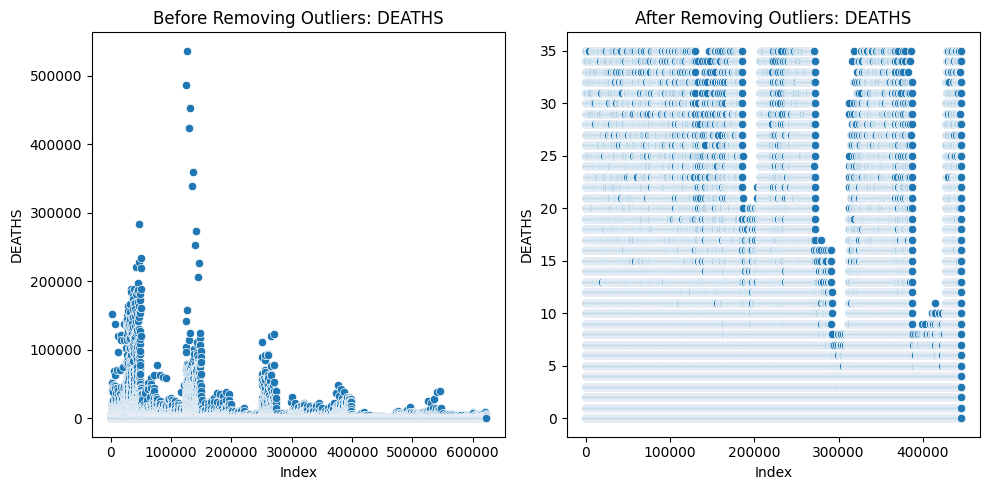

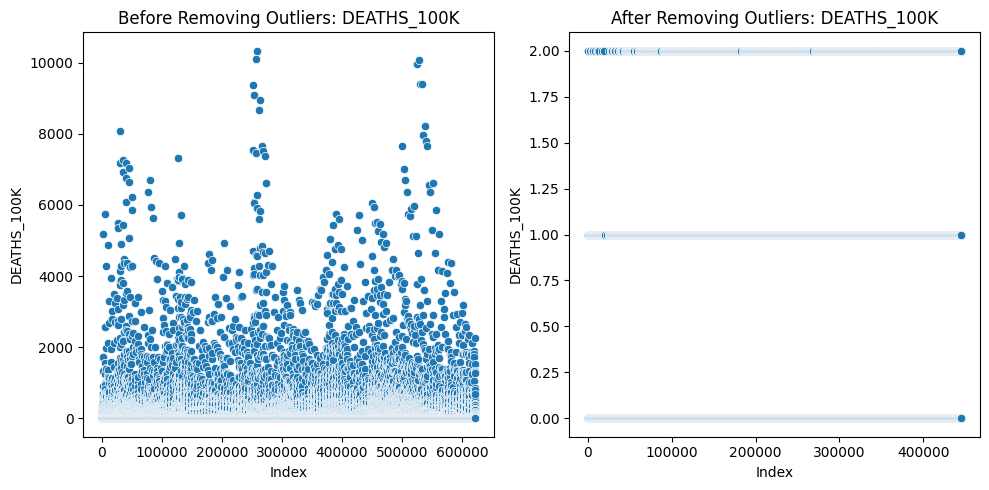

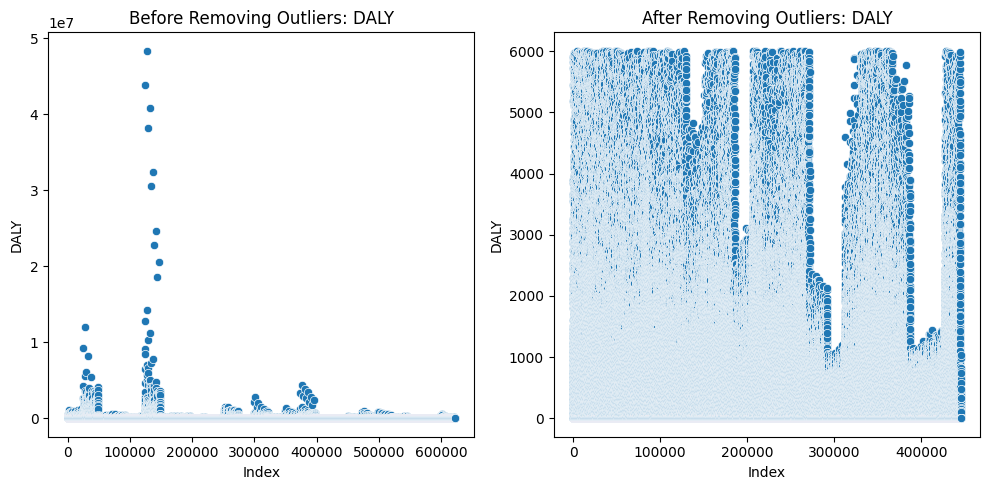

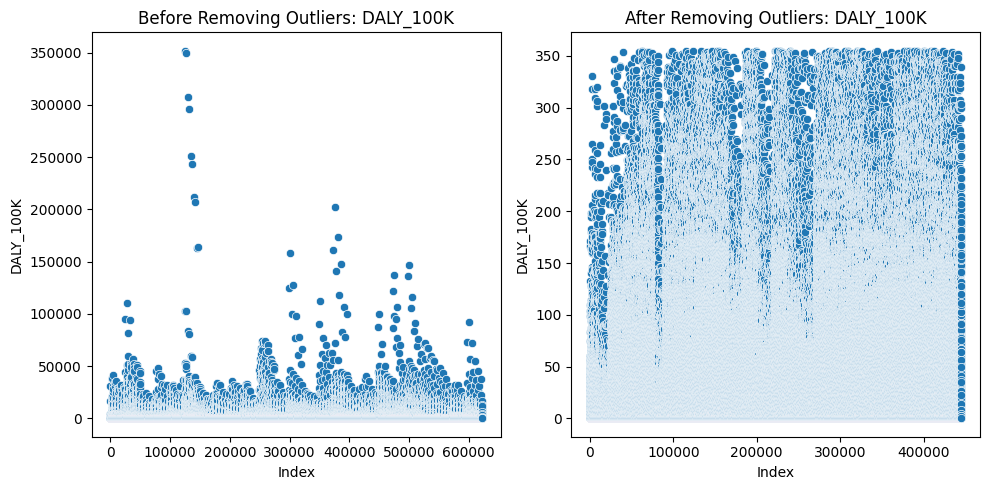

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("D:\\WHODataUpdated.csv")

columns_to_check = ['DEATHS', 'DEATHS_100K', 'DALY', 'DALY_100K']

outliers_counts = {}

df_original = df.copy()
outliers_indices = set()  

for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_indices.update(df[(df[column] < lower_bound) | (df[column] > upper_bound)].index)

    outliers_counts[column] = len(outliers_indices)
    print(f"Outliers in {column}: {outliers_counts[column]}")

outliers_indices = list(outliers_indices)

df_clean = df.drop(outliers_indices)

print("Number of data points after removing outliers:", df_clean.shape[0])

figsize = (10, 5)

for column in columns_to_check:
    fig, ax = plt.subplots(1, 2, figsize=figsize) 

    sns.scatterplot(data=df_original, x=range(len(df_original)), y=column, ax=ax[0])
    ax[0].set_title(f'Before Removing Outliers: {column}')
    ax[0].set_xlabel("Index")
    ax[0].set_ylabel(column)

    sns.scatterplot(data=df_clean, x=range(len(df_clean)), y=column, ax=ax[1])
    ax[1].set_title(f'After Removing Outliers: {column}')
    ax[1].set_xlabel("Index")
    ax[1].set_ylabel(column)

    plt.tight_layout() 
    plt.show()
